# Excavator use-case 8: Advanced Cost Functions

In [11]:
%matplotlib widget
import processscheduler as ps

problem = ps.SchedulingProblem(name="Excavator8:AdvancedCostFunction", horizon=40)

# three tasks
dig_small_hole = ps.VariableDurationTask(name="DigSmallHole", work_amount=3)
dig_medium_hole = ps.VariableDurationTask(name="DigMediumHole", work_amount=7)
dig_huge_hole = ps.VariableDurationTask(name="DigHugeHole", work_amount=15)

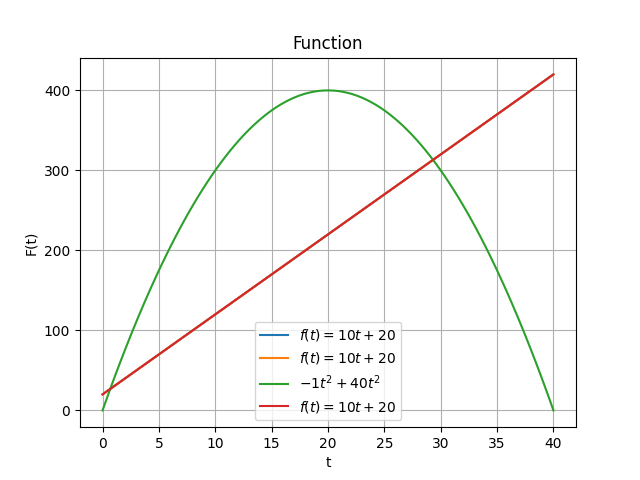

In [12]:
# cost function for the small excavator is linear
# C(t) = 10t+20
small_exc_cost = ps.LinearFunction(slope=10, intercept=20)
ps.plot_function(small_exc_cost, interval=[0, 40])

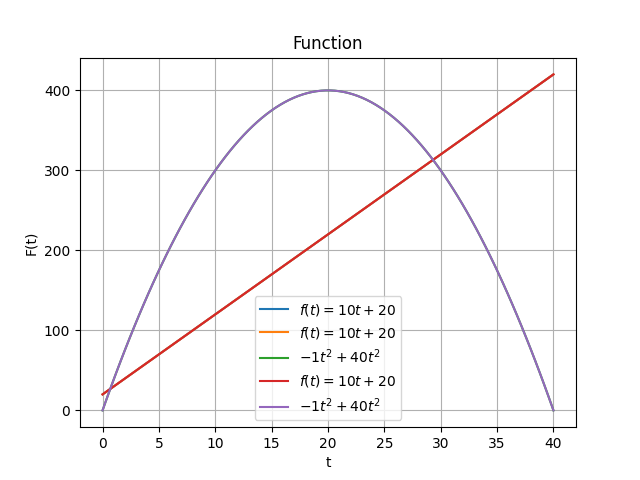

In [13]:
# cost function for the medium excavator is quadratic, max at the middle
# C(t) = 400-(t-20)**2 = -t**2 + 40t
medium_exc_cost = ps.PolynomialFunction(coefficients=[-1, 40, 0])
ps.plot_function(medium_exc_cost, interval=[0, 40])

In [14]:
small_exc = ps.Worker(name="SmallExcavator", productivity=4, cost=small_exc_cost)
medium_ex = ps.Worker(name="MediumExcavator", productivity=6, cost=medium_exc_cost)

dig_small_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_medium_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_huge_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)

In [15]:
ps.ObjectiveMinimizeResourceCost(list_of_resources=[small_exc, medium_ex])

MinimizeResourceCostSmallExcavatorMediumExcavator(<class 'processscheduler.objective.ObjectiveMinimizeResourceCost'>)
0 assertion(s):

In [16]:
solver = ps.SchedulingSolver(problem=problem, max_time=30)

In [ ]:
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 10476 elapsed time:0.047s
	Checking better value < 10476
	Found value: 1018 elapsed time:0.090s
	Checking better value < 1018
